# Project Report

*Avinash Konduru*

# Sentiment Analysis using Machine learning techniques

# Table of Contents
* [Introduction](#Introduction)
* [Dataset](#DataSet)
* [Code](#Code)
* [Results](#Results)
* [Conculstion](#Conclusion)
* [References](#References)


## Summary

* This project would discuss different Sentiment Analysis techniques on Polar Movie Reviews Dataset
    * Naive Bayes Classifer
    * Multinomial Naive Classifer
    * Maximum Entropy Classifer
    * Stochastic Gradient Descent Classifier
    * Logistic Regression
    * LinearSVC Classifier
    * NuSVC Classifier
    
I would be discussing accuracies obtained on the dataset by these different classifiers and see which one would give us the best results and which classifier is best of the dataset. 

I would be using NLTK package available in python to apply these techiniques and also I have implemented Naive Bayes method for classification and will compare the results with packages provided by NTLK  and discuss what went wrong and what went good with the implementation.

## Introduction

Social media is a popular network through which user can share their reviews about various topics, news, products etc. People use internet to access or update reviews so it is necessary to express opinion. 

Sentiment analysis is an ongoing research area which is growing due to use of various applications. Sentiment analysis is also called as opinion mining. People give their reviews in form of unstructured format via blogs, forums etc. These unstructured reviews are preprocessed to extract opinion from it and this opinion is positive, negative or neutral.

I have taken dataset from the site https://www.cs.cornell.edu/people/pabo/movie-review-data/, which contains the 5331  samples of Negative reviews and 5331 samples of Positive reviews of different movies by different users.

**Sample data** from the dataset

* ** Negative reviews** 
    * simplistic , silly and tedious . 
    * it's so laddish and juvenile , only teenage boys could possibly find it funny . 
    * exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 

* ** Positive reviews** 
    * if you sometimes like to go to the movies to have fun , wasabi is a good place to start .
    * the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
    * offers a breath of the fresh air of true sophistication . 
    
In classification problem, we will try to produce a correlation between a feature *D* and a class *C*

Before we build the model, we would need to pre-process the data by using below steps

* **Tokenization** - Tokenization is a process of breaking down each review into words/tokens.
* **Word Normalization** - Word Normalization is the process of removing the affixes
* **Bag-of-words** - Bag-of-words is the collection of all words for all the reviews in the training text, which could be used to create the model.

### Naive Bayes

Naive Bayes [7] classifiers are studying the classification task from a Statistical point of view. The starting point is that the probability of a class C is given by the posterior probability $ P(C|D) $ given a training document D. Here D refers to all of the text in the entire training set. It is given by $ D = ( d_{1}, d_{2}, .., d_{n} )$, where $d_{i}$ is the $i_{th}$ attribute (word) of document D.

Using Bayes rule, this posterior probability is defined as follows



$$
\begin{align*}
    P(C =c_{i}\;|\; D) & = \frac{P(D\;|\;C=c_{i})  P(C=c_{i})}{P(D)}\\
\end{align*}
$$

Since the $P(D)$ is equal for all classes, it can be ignored which reduces the equation to: 

$$
\begin{align*}
    P(C =c_{i}\;|\; D) & = P(D\;|\;C=c_{i})  P(C=c_{i})\\
\end{align*}
$$

Since we would need to get the class which has the maximum probability, the final equation can be written as:

$$
\begin{align*}
    C_{NB} = argmax P(C)\prod_{i} P(d_{i}\;|\; D) \\
\end{align*}
$$

where,
$$
\begin{align*}
    P(d_{i}\;|\; D) & = \frac{count(d_{i},C) }{\sum_{i}count(d_{i},C)}\\
\end{align*}
$$

### Maximum Entropy

The principle behind Maximum Entropy [7] is the one distribution that maximizes the Entropy / uncertainty and still meets the constraints. The idea behind Maximum Entropy is that we want  build a model which is unbiased as much as possible. It helps to assign the events which are not excluded by known constraints to uncertainity as much as possible and which helps us giving the maximum value for Entropy.

$$
\begin{align*}
    P(c\;|\; D) & = \frac{1 }{Z(d)} \exp(\sum_{i} \lambda_{i}f_{i}(d,C))\\
\end{align*}
$$

where,

$$
\begin{align*}
    Z(d) & = \sum_{c} \exp(\sum_{i}\lambda_{i}f_{i}(d,C))) \\
\end{align*}
$$


These models are widely used in Sentiment Analysis classification and although this is a classification alogorithm, this is different to the problems that we have solved till now in the course, which is reason to pick this problem for the project.

I have tried implementing the Navie Bayes method, which does not give better results when we compared to the ones provided the NLTK package. There are more results in mentioned in the results section.

### Support Vector Machines

Support Vector Machine [7] is a simple Linear classification alogorithm which tries to find a hyperplane, which seperates the data into two classes as optimally as possible, which implies that SVM tries to seperate the points in such as way that it maximizes the distance of each from this plane.


$$
\begin{align*}
(\vec{w}^{\,t} \cdot \vec{x}^{\,t}) &= \sum_{i}\lambda_{i}\alpha_{i}( \vec{x_{i}}^{\,t} \cdot \vec{x}^{\,t} ) +b 
\end{align*}
$$

where, $ \vec{x_{i}}^{\,t} $ = $(x_{i1},x_{i2},..,x_{in}) $  is a n-dimensional input vector, $y_{i}$ is the output vector, i.e., class, $ \vec{w}^{\,t} $ = $(w_{1},w_{2},..,w_{n}) $ with vector defining the hyper plane and $\alpha_{i}$terms are the Lagrangian multipliers.




## Code

In [94]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

from nltk.tokenize import word_tokenize
import copy

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time
import numpy as np
from decimal import Decimal
import re
from collections import Counter

In [58]:

class Classifier:
    
    def __init__(self, classifierName, posFile, negFile):
        
        self._name = classifierName
        
        pos = pd.read_table(posFile,delimiter='\n',header=None, names=["text"] )
        pos['sentiment'] = 1 #1 for positive

        neg = pd.read_table(negFile,delimiter='\n',header=None, names=["text"] )
        neg['sentiment'] = 2 #2 for negative
        
        pos_words=[]
        for s in pos['text']:
            pos_words.extend(word_tokenize(str(s)))

        neg_words=[]
        for s in neg['text']:
            neg_words.extend(word_tokenize(str(s)))

        all_words=[]
        for w in pos_words:
            all_words.append(w.lower())

        for w in neg_words:
            all_words.append(w.lower())

            
        all_words = nltk.FreqDist(all_words)

        self.word_features = list(all_words.keys())[:int(len(all_words)*0.6)]
        
        documents = pos.get_values()
        documents = np.concatenate((documents,neg.get_values()),axis=0)

        #shuffle the documents
        random.shuffle(documents)

        #prepare X and T, classification
        self.X = documents
        self.T = documents[:,1:2]
        
        if classifierName == 'NaiveBayesClassifier':
            self.classifier = nltk.NaiveBayesClassifier
        elif classifierName == 'MaxEntropy':
            self.classifier = nltk.MaxentClassifier
        elif classifierName == 'MultinomialNB':
            self.classifier = SklearnClassifier(MultinomialNB())
        elif classifierName == 'BernoulliNB':
            self.classifier = SklearnClassifier(BernoulliNB())
        elif classifierName == 'LogisticRegression':
            self.classifier = SklearnClassifier(LogisticRegression())
        elif classifierName == 'SGDClassifier':
            self.classifier = SklearnClassifier(SGDClassifier())
        elif classifierName == 'LinearSVC':
            self.classifier = SklearnClassifier(SGDClassifier())
        elif classifierName == 'NuSVC':
            self.classifier = SklearnClassifier(SGDClassifier())
        else:
            raise ValueError('Not a valid classifier name')
        
        self.res=None
        
    
    def find_features(self,document):
        words = word_tokenize(document)
        features = {}
        for w in self.word_features:
            features[w] = (w in words)

        return features
    
    def train(self,Xtrain,numIterations = 100, algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]):
        
        print('Training the dataset')
        
        featuresets = [(self.find_features(rev), category) for (rev, category) in Xtrain]
        
        if self._name == 'MaxEntropy':
            self.classifier = self.classifier.train(featuresets, algorithm, max_iter=numIterations)
            #classifier.show_most_informative_features(10)
        else:
            self.classifier = self.classifier.train(featuresets)
        
        print('Training the dataset is done')
    
    def evaluate(self,X,T):
        
        featuresets = [(self.find_features(rev), category) for (rev, category) in X]
        print('testing_set = ',len(featuresets))
        results = np.array([[1]])
        i=0
        for review in featuresets:
            label = review[1]
            text = review[0]
            determined_label = self.classifier.classify(text)
            if i ==0:
                results [0] = determined_label
                i= i+1
            else:
                results = np.concatenate((results,np.array([[determined_label]])),axis=0)
        
        self.res = results
        #print("Original {0} accuracy percent:{1}".format(self._name, (nltk.classify.accuracy(self.classifier, testing_set))*100))
        
        #plot the results
        self.Plot(results,T)
        
        
        return (Decimal(np.sum(T==results)/X.shape[0]) * 100)#(nltk.classify.accuracy(self.classifier, featuresets))*100
    
    def Plot(self,results, T):
        
        style.use("ggplot")

        fig = plt.figure()
        ax1 = fig.add_subplot(1,1,1)
        
        #start plotting expected results
        xar = []
        yar = []

        x = 0
        y = 0

        for l in T:
            x += 1
            if l==1:
                y += 1
            elif l==2:
                y -= 1

            xar.append(x)
            yar.append(y)
 
        ax1.scatter(xar,yar)
        
        #start plotting determined results
        xar = []
        yar = []

        x = 0
        y = 0

        for l in results:
            x += 1
            if l==1:
                y += 1
            elif l==2:
                y -= 1

            xar.append(x)
            yar.append(y)
            
        ax1.scatter(xar,yar)
        
        plt.legend(('Actual', 'Predicted'))
                    
        plt.show()
    
    def trainValidateTestKFoldsClassification(self,parameterSets,nFolds,shuffle=False,verbose=False):
        if nFolds < 3:
            raise ValueError('ERROR: trainValidateTestKFoldsClassification requires nFolds >= 3.')
        # Collect row indices for each class
        classes = np.unique(self.T)
        K = len(classes)
        rowIndicesByClass = []
        for c in classes:
            rowsThisClass = np.where(self.T == c)[0]
            if shuffle:
                np.random.shuffle(rowsThisClass)
            rowIndicesByClass.append(rowsThisClass)
        # Collect start and stop indices for the folds, within each class
        startsStops = []
        if verbose:
            print('  In each of',nFolds,'folds, Class-Counts ',"")
        for k,rowIndicesThisClass in enumerate(rowIndicesByClass):
            nSamples = len(rowIndicesThisClass)
            nEach = int(nSamples / nFolds)
            if verbose:
                print('{}-{},'.format(classes[k],nEach), " ") #'samples in each of',nFolds,'folds.')
            if nEach == 0:
                raise ValueError("trainValidateTestKFoldsClassification: Number of samples in each fold for class {} is 0.".format(k))
            startsThisClass = np.arange(0,nEach*nFolds,nEach)
            if k < K-1: #last class
                stopsThisClass = startsThisClass + nEach
            else:
                stopsThisClass = startsThisClass + nSamples #Each
            startsStops.append(list(zip(startsThisClass,stopsThisClass)))
        print()

        results = []
        for testFold in range(nFolds):
            # Leaving the testFold out, for each validate fold, train on remaining
            # folds and evaluate on validate fold. 
            bestParms = None
            bestValidationAccuracy = 0
            for parms in parameterSets:
                validateAccuracySum = 0
                for validateFold in range(nFolds):
                    if testFold == validateFold:
                        continue
                    trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                    rows = []
                    for tf in trainFolds:
                        for k in range(K):
                            a,b = startsStops[k][tf]                
                            rows += rowIndicesByClass[k][a:b].tolist()
                    Xtrain = self.X[rows,:]
                    Ttrain = self.T[rows,:]
                    # Construct Xvalidate and Tvalidate
                    rows = []
                    for k in range(K):
                        a,b = startsStops[k][validateFold]
                        rows += rowIndicesByClass[k][a:b].tolist()
                    Xvalidate = self.X[rows,:]
                    Tvalidate = self.T[rows,:]

                    self.train(Xtrain)
                    
                    validateAccuracy = self.evaluate(Xvalidate,Tvalidate)
                    
                    validateAccuracySum += validateAccuracy
                    
                validateAccuracy = validateAccuracySum / (nFolds-1)
                
                if bestParms is None or validateAccuracy > bestValidationAccuracy:
                    bestParms = parms
                    bestValidationAccuracy = validateAccuracy
            rows = []
            for k in range(K):
                a,b = startsStops[k][testFold]
                rows += rowIndicesByClass[k][a:b].tolist()
            Xtest = self.X[rows,:]
            Ttest = self.T[rows,:]

            newXtrain = np.vstack((Xtrain,Xvalidate))
            newTtrain = np.vstack((Ttrain,Tvalidate))
            
            self.train(newXtrain,newTtrain)
            
            trainAccuracy = self.evaluate(newXtrain,newTtrain)
            testAccuracy= self.evaluate(Xtest,Ttest)

            resultThisTestFold = [bestParms, trainAccuracy,
                                  bestValidationAccuracy, testAccuracy]
            results.append(resultThisTestFold)
            if verbose:
                print(resultThisTestFold)
        return results  

    def printResults(self,results):
        print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
        print('-------------------------------------------------')
        for row in results:
            # 20 is expected maximum number of characters in printed parameter value list
            print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(self._name,str(row[0]),*row[1:])) 
    

In [96]:
class NBClassifier:
    
    def __init__(self,posFile, negFile):
        
        pos = pd.read_table(posFile,delimiter='\n',header=None, names=["text"] )
        pos['sentiment'] = 1 #1 for positive

        neg = pd.read_table(negFile,delimiter='\n',header=None, names=["text"] )
        neg['sentiment'] = 2 #2 for negative
        
        documents = pos.get_values()
        documents = np.concatenate((documents,neg.get_values()),axis=0)

        #shuffle the documents
        random.shuffle(documents)

        #prepare X and T, classification
        self.X = documents
        self.T = documents[:,1:2]
        
        
    def getUniGrams(self,data):
        nWords=[]
        pWords =[]
        for (line,category) in data:
            line = re.sub(r"[,.'-;:|\n]", "", line)
            line = line.strip().lower()
            w = line.split(' ')
            if category == 1:
                pWords.extend(w)
            elif category == 2:
                nWords.extend(w)
        return nWords,pWords

    def getBiGrams(self,data):
        nBigrams = []
        pBigrams =[]
        for (line,category) in data:
            line = re.sub(r"[,.'-;:|\n]", "", line)
            line = line.strip().lower()
            w = line.split(' ')
            for i in range(len(w)):
                
                if i ==0 :
                    bg = '_'+','+w[i]
                elif i == len(w)-1:
                    bg = w[i]+','+'_'
                else:
                    bg = w[i]+','+w[i+1]
                
                if category == 1:
                    pBigrams.extend(w)
                elif category == 2:
                    nBigrams.extend(w)
                    
        return nBigrams,pBigrams
    
    def train(self,X):
        
        
        #get negative unigrams and Bigrams
        nWords,pWords = self.getUniGrams(X)
        
        nBigrams,pBigrams = self.getBiGrams(X)

        nWords.extend(nBigrams)
        pWords.extend(pBigrams)
        
        #get counts for each words
        negWordCounts = Counter(nWords)
        posWordCounts = Counter(pWords)

        totalNegWords = len(nWords)
        totalPosWords = len(pWords)

        #print('totalNegWords = ',totalNegWords)
        #print('totalPosWords = ',totalPosWords)

        totalNumberOfWords = totalNegWords + totalPosWords

        probNegClass = Decimal(totalNegWords/totalNumberOfWords)
        probNegClass = round(probNegClass,8)
        probPosClass = Decimal(totalPosWords/totalNumberOfWords)
        probPosClass = round(probPosClass,8)

        negWordProbs = dict()
        for k in negWordCounts.keys():
            count = negWordCounts[k]
            prob = Decimal(count/totalNegWords)
            prob = round(prob,8)
            negWordProbs[k] = prob

        posWordProbs = dict()
        for k in posWordCounts.keys():
            count = posWordCounts[k]
            prob = Decimal(count/totalPosWords)
            prob = round(prob,8)
            posWordProbs[k] = prob

        return {'probNegClass':probNegClass, 'probPosClass':probPosClass,
                'negWordProbs':negWordProbs,'posWordProbs':posWordProbs, 
                'totalNegWords':totalNegWords, 'totalPosWords':totalPosWords}
    
    def evaluate(self,XTest, Ttest, model):
   
        predicted = np.zeros((1,1),dtype=np.int)
        i=0
        for (line,category) in XTest:
            line = re.sub(r"[,.'-;:|\n]", "", line)
            line = line.strip().lower()
            w = line.split(' ')
            
            for i in range(len(w)):
                
                if i ==0 :
                    bg = '_'+','+w[i]
                elif i == len(w)-1:
                    bg = w[i]+','+'_'
                else:
                    bg = w[i]+','+w[i+1]
                    
                w.extend(bg)

            lineSenti = self.getSentiment(w,model)
            
            if i==0:
                predicted[0] = lineSenti 
                i=i+1
            else:
                predicted = np.concatenate((predicted,np.array([[lineSenti]],dtype=np.int)),axis=0)
        
        self.Plot(predicted,Ttest)

        return (Decimal(np.sum(Ttest==predicted)/XTest.shape[0]) * 100)
    
    def getSentiment(self,words, model):
        probNegClass = model['probNegClass']
        probPosClass = model['probPosClass']

        negProb = 1
        posProb = 1

        negWordsCount = model['totalNegWords']
        posWordsCount = model['totalPosWords']

        negSet = model['negWordProbs']
        posSet = model['posWordProbs']        
        negKeySet = negSet.keys()
        posKeySet = posSet.keys()

        for w in words:
            if w in negKeySet:
                negProb*=negSet[w]
            else:
                prob = round(Decimal(1/negWordsCount),8)
                negProb*=prob

            if w in posKeySet:
                posProb*=posSet[w]
            else:
                prob = round(Decimal(1/posWordsCount),8)
                posProb*=prob

        negProb*=probNegClass
        posProb*=probPosClass

        return 2 if negProb > posProb else 1
    def Plot(self,results, T):
        
        style.use("ggplot")

        fig = plt.figure()
        ax1 = fig.add_subplot(1,1,1)
        
        #start plotting expected results
        xar = []
        yar = []

        x = 0
        y = 0

        for l in T:
            x += 1
            if l==1:
                y += 1
            elif l==2:
                y -= 1

            xar.append(x)
            yar.append(y)
 
        ax1.plot(xar,yar)
        
        #start plotting determined results
        xar = []
        yar = []

        x = 0
        y = 0

        for l in results:
            x += 1
            if l==1:
                y += 1
            elif l==2:
                y -= 1

            xar.append(x)
            yar.append(y)
            
        ax1.plot(xar,yar)
        
        plt.show()
    
    def trainValidateTestKFoldsClassification(self,parameterSets,nFolds,shuffle=False,verbose=False):
        if nFolds < 3:
            raise ValueError('ERROR: trainValidateTestKFoldsClassification requires nFolds >= 3.')
        # Collect row indices for each class
        classes = np.unique(self.T)
        K = len(classes)
        rowIndicesByClass = []
        for c in classes:
            rowsThisClass = np.where(self.T == c)[0]
            if shuffle:
                np.random.shuffle(rowsThisClass)
            rowIndicesByClass.append(rowsThisClass)
        # Collect start and stop indices for the folds, within each class
        startsStops = []
        if verbose:
            print('  In each of',nFolds,'folds, Class-Counts ',"")
        for k,rowIndicesThisClass in enumerate(rowIndicesByClass):
            nSamples = len(rowIndicesThisClass)
            nEach = int(nSamples / nFolds)
            if verbose:
                print('{}-{},'.format(classes[k],nEach), " ") #'samples in each of',nFolds,'folds.')
            if nEach == 0:
                raise ValueError("trainValidateTestKFoldsClassification: Number of samples in each fold for class {} is 0.".format(k))
            startsThisClass = np.arange(0,nEach*nFolds,nEach)
            if k < K-1: #last class
                stopsThisClass = startsThisClass + nEach
            else:
                stopsThisClass = startsThisClass + nSamples #Each
            startsStops.append(list(zip(startsThisClass,stopsThisClass)))
        print('Started applying the KFold evaluation')
        
        results = []
        for testFold in range(nFolds):
            # Leaving the testFold out, for each validate fold, train on remaining
            # folds and evaluate on validate fold. 
            bestParms = None
            bestValidationAccuracy = 0
            for parms in parameterSets:
                validateAccuracySum = 0
                for validateFold in range(nFolds):
                    if testFold == validateFold:
                        continue
                    trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                    rows = []
                    for tf in trainFolds:
                        for k in range(K):
                            a,b = startsStops[k][tf]                
                            rows += rowIndicesByClass[k][a:b].tolist()
                    Xtrain = self.X[rows,:]
                    Ttrain = self.T[rows,:]
                    # Construct Xvalidate and Tvalidate
                    rows = []
                    for k in range(K):
                        a,b = startsStops[k][validateFold]
                        rows += rowIndicesByClass[k][a:b].tolist()
                    Xvalidate = self.X[rows,:]
                    Tvalidate = self.T[rows,:]

                    model = self.train(Xtrain)
                    
                    validateAccuracy = self.evaluate(Xvalidate,Tvalidate,model)
                    
                    validateAccuracySum += validateAccuracy
                    
                validateAccuracy = validateAccuracySum / (nFolds-1)
                
                if bestParms is None or validateAccuracy > bestValidationAccuracy:
                    bestParms = parms
                    bestValidationAccuracy = validateAccuracy
            rows = []
            print('End applying the KFold evaluation')
            print('Starting final evaluation')
            for k in range(K):
                a,b = startsStops[k][testFold]
                rows += rowIndicesByClass[k][a:b].tolist()
            Xtest = self.X[rows,:]
            Ttest = self.T[rows,:]
            
            newXtrain = np.vstack((Xtrain,Xvalidate))
            newTtrain = np.vstack((Ttrain,Tvalidate))
            
            model = self.train(newXtrain)
            
            trainAccuracy = self.evaluate(newXtrain,newTtrain,model)
            testAccuracy= self.evaluate(Xtest,Ttest,model)

            resultThisTestFold = [bestParms, trainAccuracy,
                                  bestValidationAccuracy, testAccuracy]
            results.append(resultThisTestFold)
            if verbose:
                print(resultThisTestFold)
            
            print('End final evaluation')
        return results  

    def printResults(self,results):
        print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
        print('-------------------------------------------------')
        for row in results:
            # 20 is expected maximum number of characters in printed parameter value list
            print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format("NB",str(row[0]),*row[1:])) 
    


## Results

Training the dataset
Training the dataset is done
testing_set =  2133


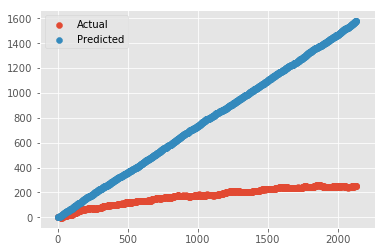

Accuracy of Naive Bayes Classifier =  59.63431786216596419691882147


In [60]:
nb_classifier = Classifier("NaiveBayesClassifier","poistive.txt","negative.txt")
XTrain = nb_classifier.X[:int(nb_classifier.X.shape[0]*0.8)]
Ttrain = nb_classifier.T[:int(nb_classifier.T.shape[0]*0.8)]
XTest = nb_classifier.X[int(nb_classifier.X.shape[0]*0.8):]
Ttest = nb_classifier.T[int(nb_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape

nb_classifier.train(XTrain)
accuracy = nb_classifier.evaluate(XTest,Ttest)
print('Accuracy of Naive Bayes Classifier = ', accuracy)

In [82]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(nb_classifier.res==1)
preNeg = np.sum(nb_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          1857.000000           276.000000 


Naive Bayes Classifier has a accuracy of 59.63. Looking at the above counts, this classifier mostly returned  negative reviews as Positive. This classifier has a very good accuracy classifying the positive reviews, and performed 70% poorly with negative reviews

Training the dataset
Training the dataset is done
testing_set =  2133


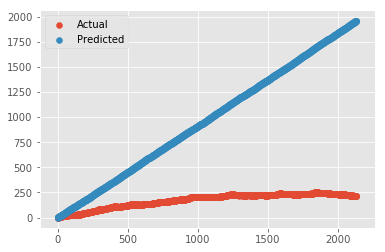

Accuracy of Multinomial Naive Bayes Classifier =  56.11814345991561481241660658


In [61]:
mnb_classifier = Classifier("MultinomialNB","poistive.txt","negative.txt")
XTrain = mnb_classifier.X[:int(mnb_classifier.X.shape[0]*0.8)]
Ttrain = mnb_classifier.T[:int(mnb_classifier.T.shape[0]*0.8)]
XTest = mnb_classifier.X[int(mnb_classifier.X.shape[0]*0.8):]
Ttest = mnb_classifier.T[int(mnb_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
mnb_classifier.train(XTrain)
accuracy = mnb_classifier.evaluate(XTest,Ttest)
print('Accuracy of Multinomial Naive Bayes Classifier = ', accuracy)

In [83]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(mnb_classifier.res==1)
preNeg = np.sum(mnb_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          2046.000000            87.000000 


Multinomial Naive Bayes Classifier has a accuracy of 56.63. Looking at the above counts, this classifier mostly returned  negative reviews as Positive. This classifier has a very good accuracy classifying the positive reviews, and performed very poorly with negative reviews. Naive Bayes is worked better when compared to this classifier

Training the dataset
Training the dataset is done
testing_set =  2133


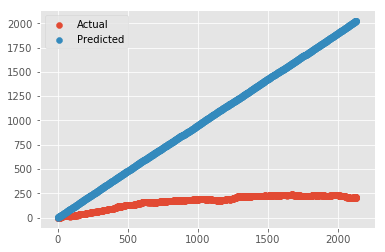

Accuracy of Binomial Naive Bayes Classifier =  54.33661509610876461096040657


In [62]:
bnb_classifier = Classifier("BernoulliNB","poistive.txt","negative.txt")
XTrain = bnb_classifier.X[:int(bnb_classifier.X.shape[0]*0.8)]
Ttrain = bnb_classifier.T[:int(bnb_classifier.T.shape[0]*0.8)]
XTest = bnb_classifier.X[int(bnb_classifier.X.shape[0]*0.8):]
Ttest = bnb_classifier.T[int(bnb_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
bnb_classifier.train(XTrain)
accuracy = bnb_classifier.evaluate(XTest,Ttest)
print('Accuracy of Binomial Naive Bayes Classifier = ', accuracy)

In [84]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(bnb_classifier.res==1)
preNeg = np.sum(bnb_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          2080.000000            53.000000 


Naive Bayes Classifier has a accuracy of 54.336. Looking at the above counts, this classifier mostly returned  negative reviews as Positive. This classifier has a very good accuracy classifying the positive reviews, and performed very poorly with negative reviews alos when compared with other reviews.

Out of these 3 Naive Bayes classifiers, first one works very well with dataset. Since our train dataset conatins only ~8000 reviews, may be increase in more data may give the classifier more words, which might increase the accuracy a little more.

Training the dataset
Training the dataset is done
testing_set =  2133


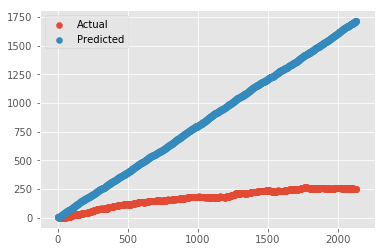

Accuracy of Logistic Regression Classifier =  65.02578527894983251300686788


In [63]:
lr_classifier = Classifier("LogisticRegression","poistive.txt","negative.txt")
XTrain = lr_classifier.X[:int(lr_classifier.X.shape[0]*0.8)]
Ttrain = lr_classifier.T[:int(lr_classifier.T.shape[0]*0.8)]
XTest = lr_classifier.X[int(lr_classifier.X.shape[0]*0.8):]
Ttest = lr_classifier.T[int(lr_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
lr_classifier.train(XTrain)
accuracy = lr_classifier.evaluate(XTest,Ttest)
print('Accuracy of Logistic Regression Classifier = ', accuracy)

In [85]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(lr_classifier.res==1)
preNeg = np.sum(lr_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          1925.000000           208.000000 


Logistic Regression Classifier has a accuracy of 65.02. This has even have better performance when compared to Naive Bayes. Looking at the above counts, the number of predictions for negative reviews is less than when compared to Naive Bayes. Seems like this classifier has even better accuracy for predicting positive reviews, but did poorly when for Negative reviews, even though this has accuarcy of 20% in identifying negative sentiments, Naive Bayes is better than Logistic regression.

Training the dataset
Training the dataset is done
testing_set =  2133


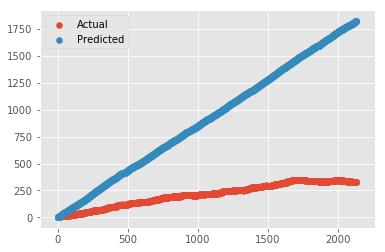

Accuracy of SGDC Classifier =  64.51007969995311563948803268


In [64]:
sgdc_classifier = Classifier("SGDClassifier","poistive.txt","negative.txt")
XTrain = sgdc_classifier.X[:int(sgdc_classifier.X.shape[0]*0.8)]
Ttrain = sgdc_classifier.T[:int(sgdc_classifier.T.shape[0]*0.8)]
XTest = sgdc_classifier.X[int(sgdc_classifier.X.shape[0]*0.8):]
Ttest = sgdc_classifier.T[int(sgdc_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
sgdc_classifier.train(XTrain)
accuracy = sgdc_classifier.evaluate(XTest,Ttest)
print('Accuracy of SGDC Classifier = ', accuracy)

In [86]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(sgdc_classifier.res==1)
preNeg = np.sum(sgdc_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          1978.000000           155.000000 


SGD Classifier has a accuracy of 64.51. This has even have better performance when compared to Naive Bayes. Looking at the above counts, the number of predictions for negative reviews is less than when compared to Naive Bayes as well Logistic Regression. Seems like this classifier has even better accuracy for predicting positive reviews, but did poorly when for Negative reviews, even though this has accuarcy of ~15% in identifying negative sentiments, Naive Bayes is better than Logistic regression, SGD classifier

Training the dataset
Training the dataset is done
testing_set =  2133


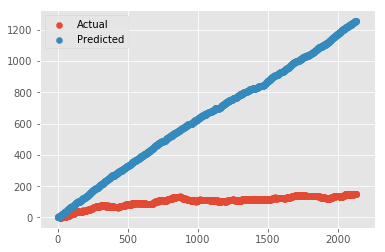

Accuracy of Linear Support Vector Classifier =  70.55789967182372057763473094


In [73]:
lsvc_classifier = Classifier("LinearSVC","poistive.txt","negative.txt")
XTrain = lsvc_classifier.X[:int(lsvc_classifier.X.shape[0]*0.8)]
Ttrain = lsvc_classifier.T[:int(lsvc_classifier.T.shape[0]*0.8)]
XTest = lsvc_classifier.X[int(lsvc_classifier.X.shape[0]*0.8):]
Ttest = lsvc_classifier.T[int(lsvc_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
lsvc_classifier.train(XTrain)
accuracy = lsvc_classifier.evaluate(XTest,Ttest)
print('Accuracy of Linear Support Vector Classifier = ', accuracy)

In [87]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(lsvc_classifier.res==1)
preNeg = np.sum(lsvc_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1142.000000           991.000000          1696.000000           437.000000 


Linear Support Vector Classifier has a accuracy of 70.55. This has better performance when compared to any other models that we have discussed till now. Looking at the above counts, seems like this classifier has even better accuracy for predicting positive reviews, as well negative reviews.This has accuarcy of ~44% in identifying negative sentiments, which almost twice than the other models.

Training the dataset
Training the dataset is done
testing_set =  2133


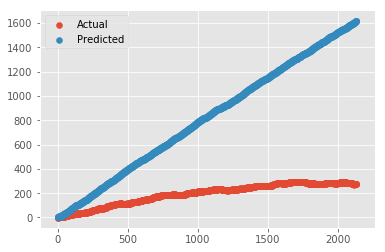

Accuracy of NuSVC Classifier =  66.38537271448663457107386421


In [88]:
nsvc_classifier = Classifier("NuSVC","poistive.txt","negative.txt")
XTrain = nsvc_classifier.X[:int(nsvc_classifier.X.shape[0]*0.8)]
Ttrain = nsvc_classifier.T[:int(nsvc_classifier.T.shape[0]*0.8)]
XTest = nsvc_classifier.X[int(nsvc_classifier.X.shape[0]*0.8):]
Ttest = nsvc_classifier.T[int(nsvc_classifier.T.shape[0]*0.8):]
#XTrain.shape,Ttrain.shape,XTest.shape,Ttest.shape
nsvc_classifier.train(XTrain)
accuracy = nsvc_classifier.evaluate(XTest,Ttest)
print('Accuracy of NuSVC Classifier = ', accuracy)

In [89]:
nofPos = np.sum(Ttest==1)
nofNeg = np.sum(Ttest==2)
prePos = np.sum(nsvc_classifier.res==1)
preNeg = np.sum(nsvc_classifier.res==2)
print('{:s} {:>20s}{:>20s}{:>20s}'.format('nofPos','nofNeg','prePos','preNeg'))
print('{:>4f} {:>20f} {:>20f} {:>20f} '.format(nofPos,nofNeg,prePos,preNeg))

nofPos               nofNeg              prePos              preNeg
1203.000000           930.000000          1876.000000           257.000000 


Linear Support Vector Classifier has a accuracy of 66.38. This has the same performance as Naive Bayes, Logistic Regression and Stochastic Gradient Descent. Looking at the above counts, seems like this classifier has better accuracy for predicting positive reviews, but did poor with negative reviews when compared to Linear SV classifier.This has accuarcy of ~26% in identifying negative sentiments, which is half of Linear SVC.

Started applying the KFold evaluation


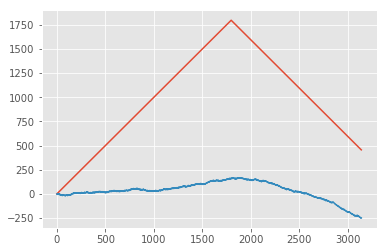

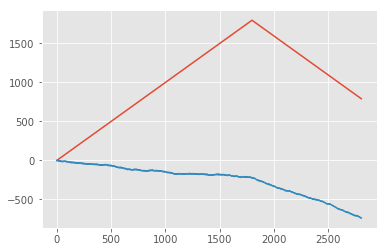

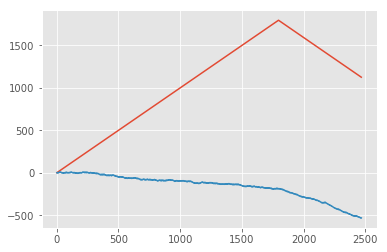

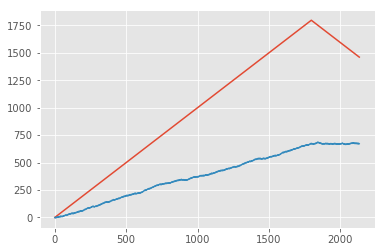

/Users/Avinash/anaconda/envs/python26/lib/python3.6/site-packages/ipykernel_launcher.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


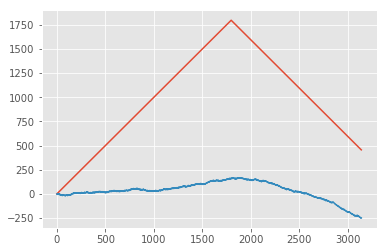

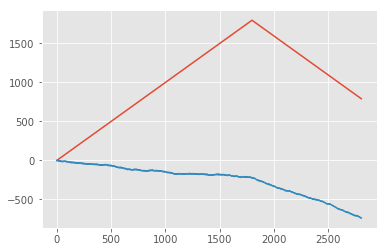

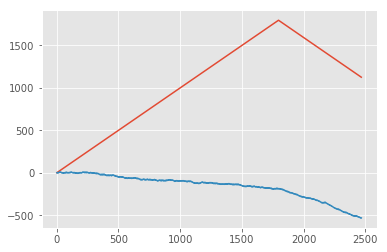

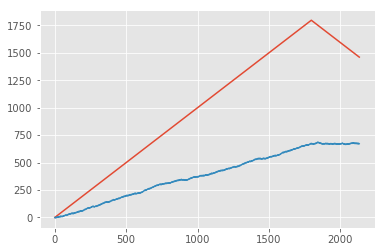

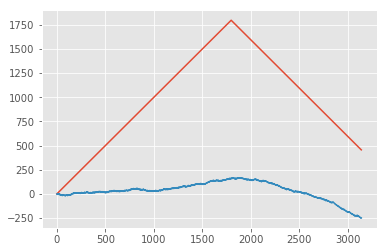

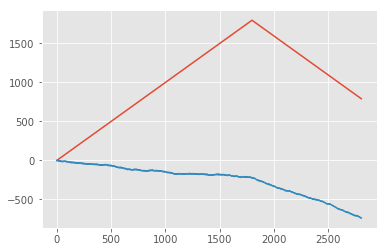

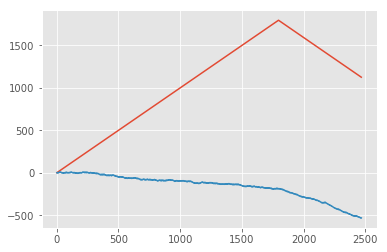

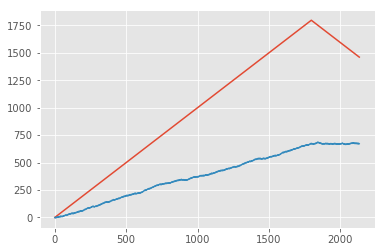

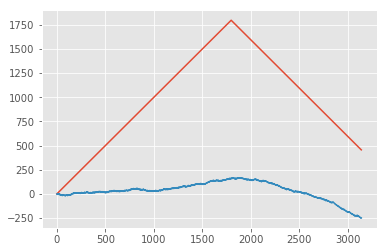

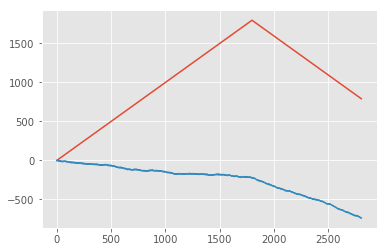

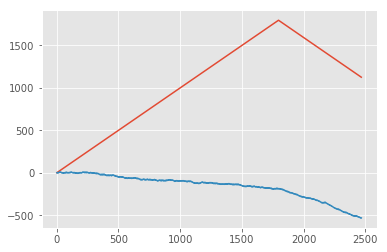

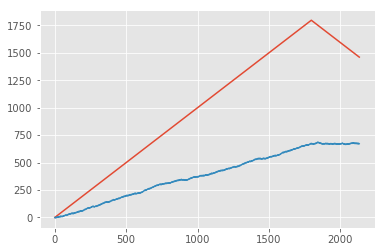

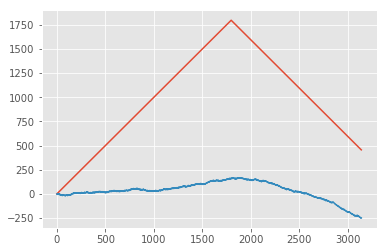

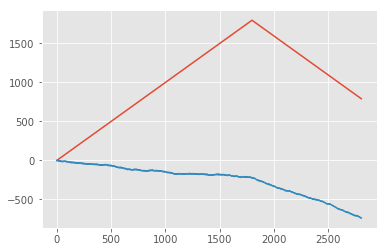

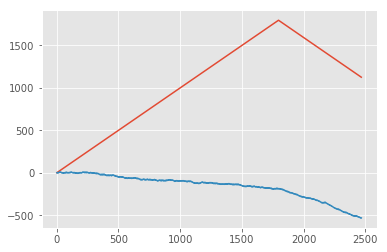

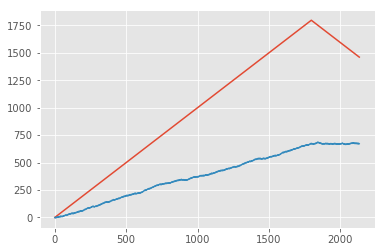

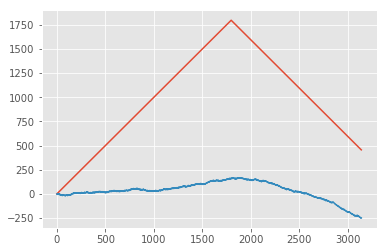

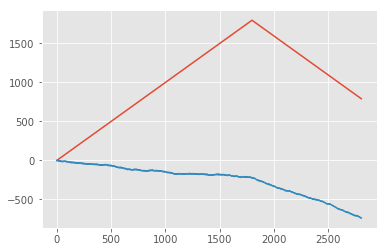

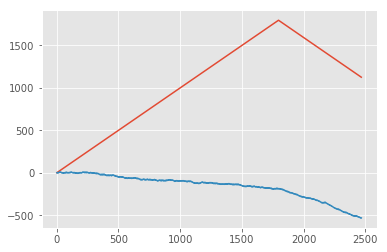

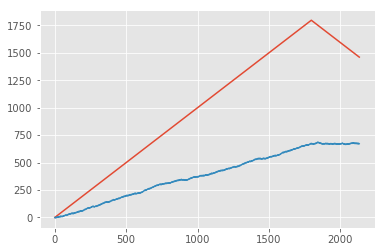

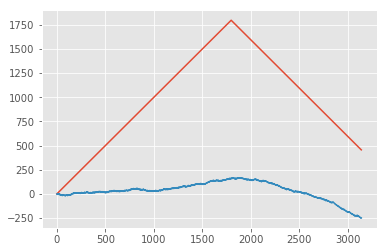

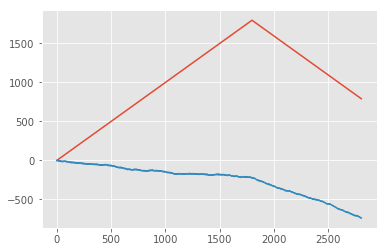

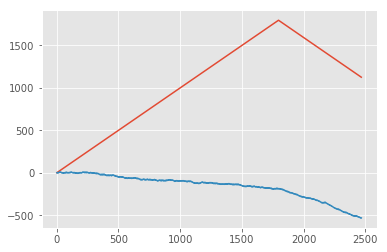

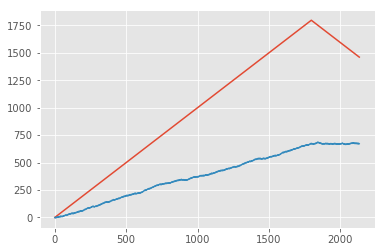

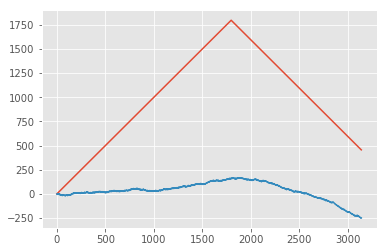

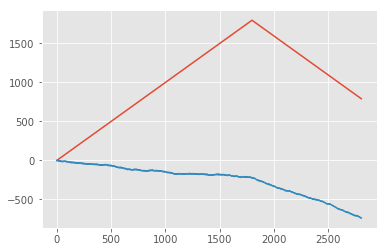

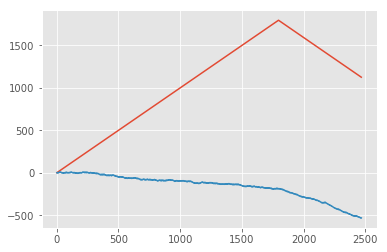

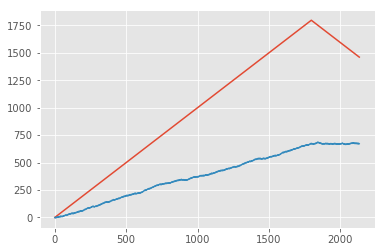

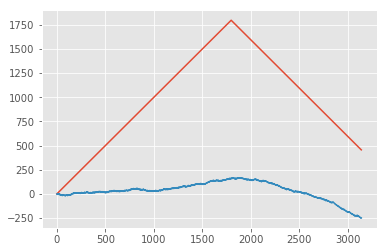

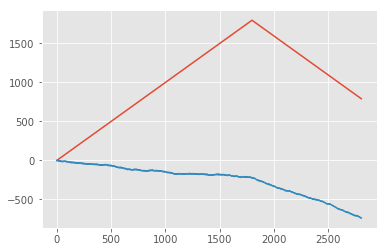

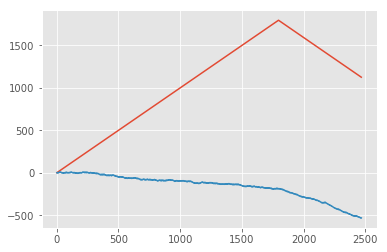

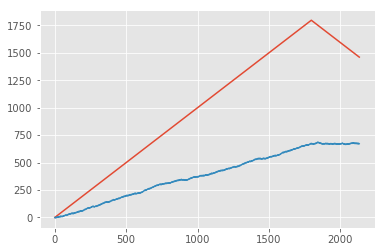

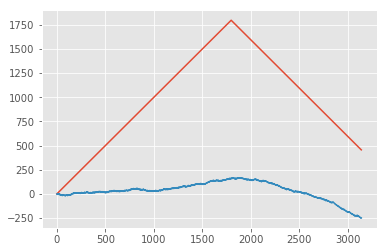

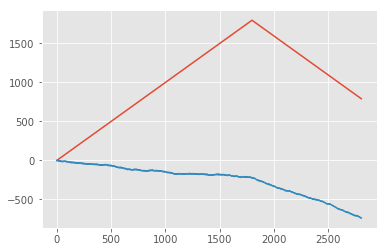

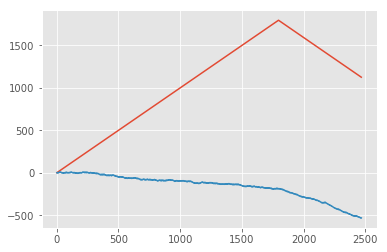

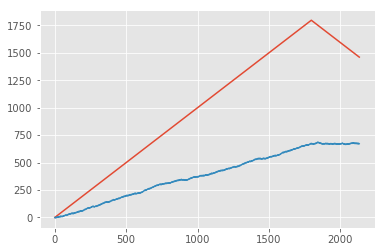

End applying the KFold evaluation
Starting final evaluation


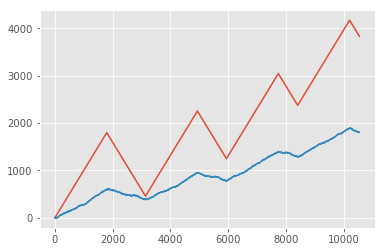

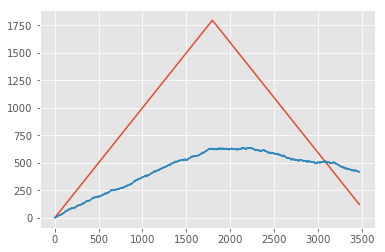

End final evaluation


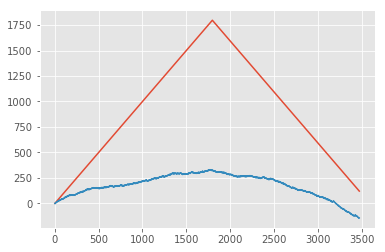

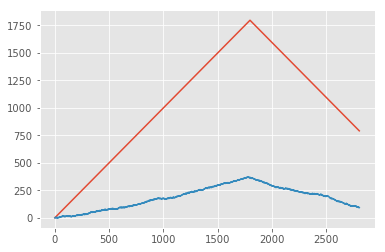

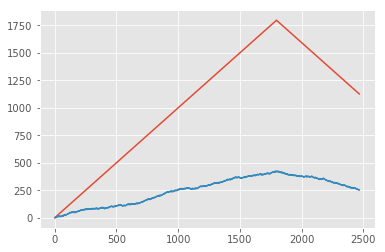

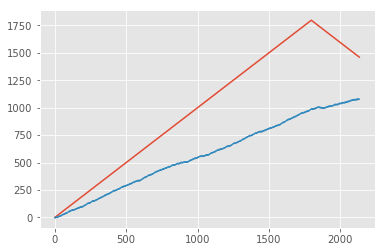

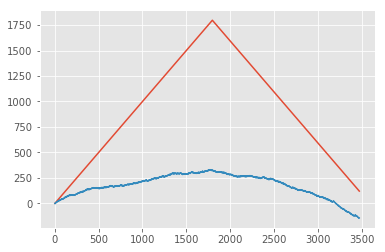

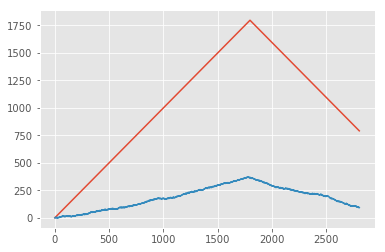

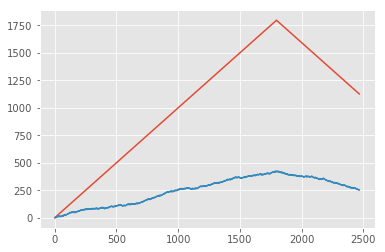

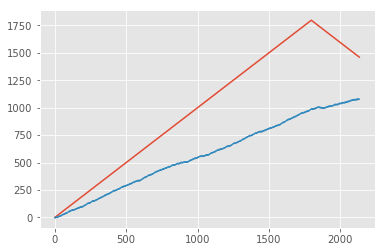

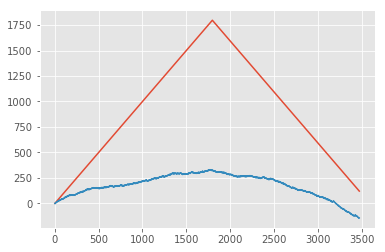

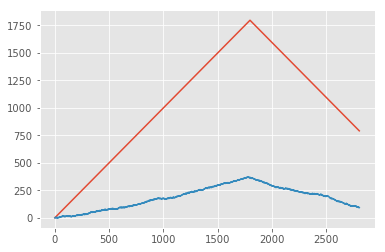

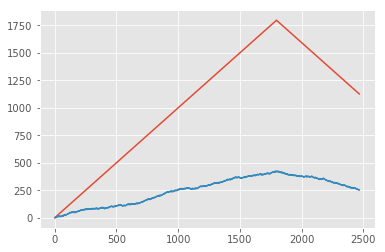

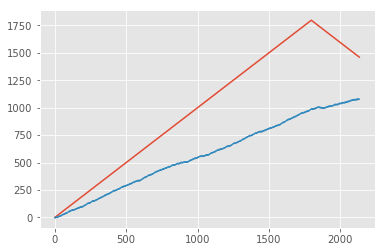

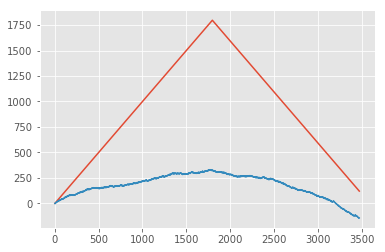

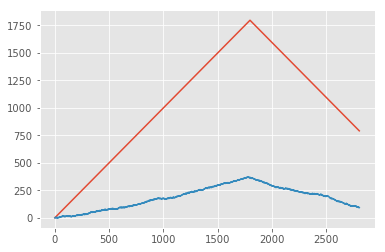

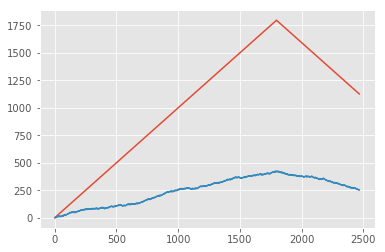

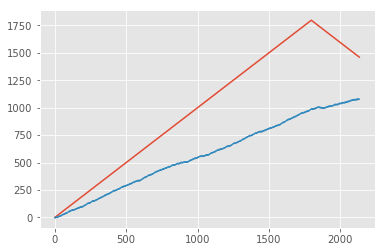

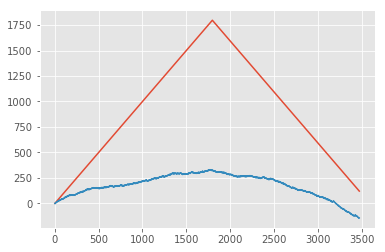

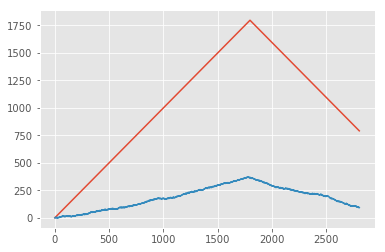

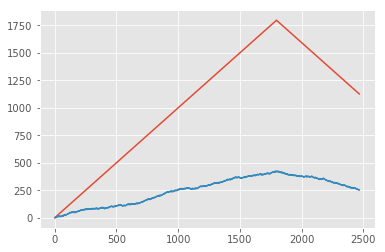

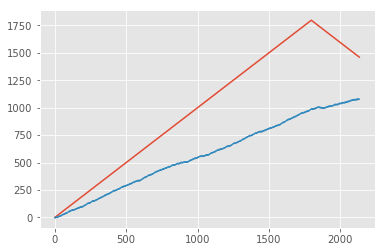

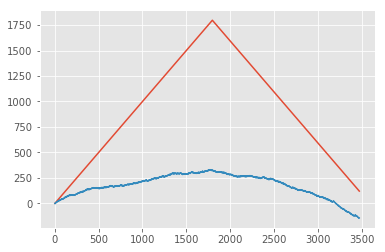

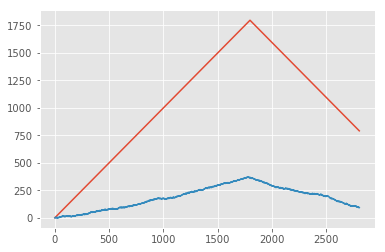

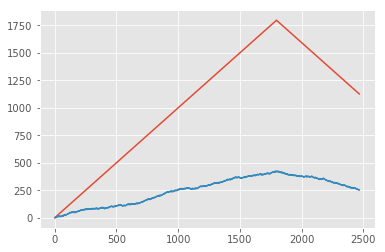

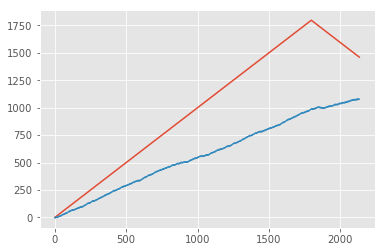

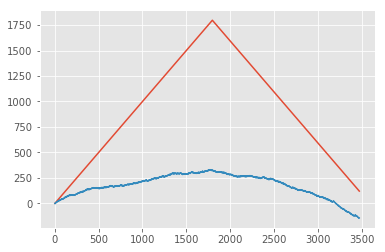

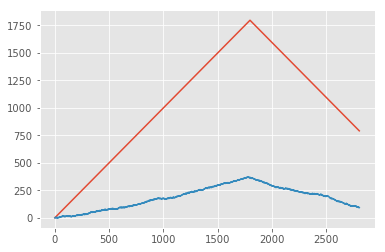

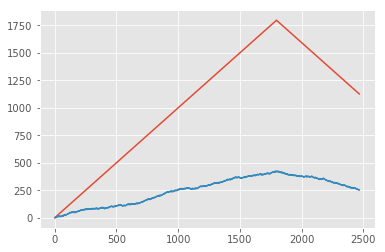

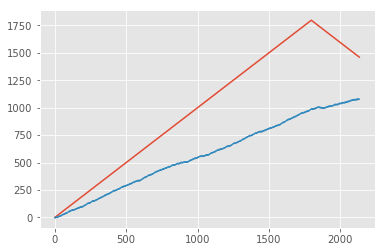

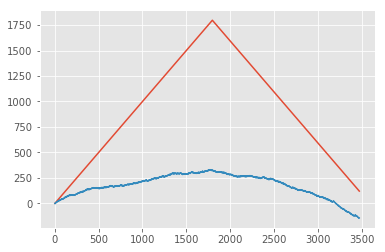

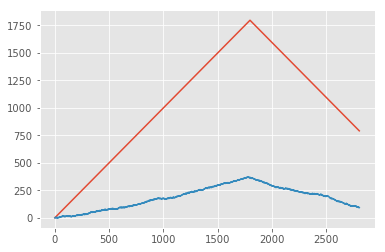

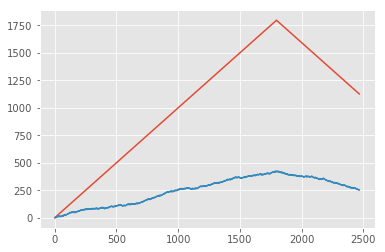

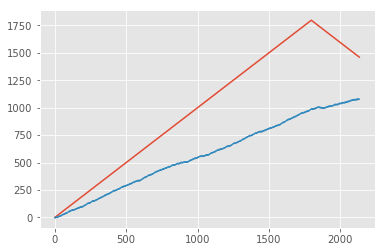

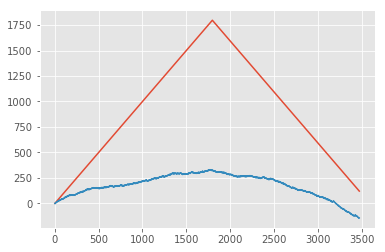

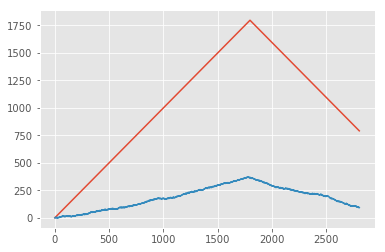

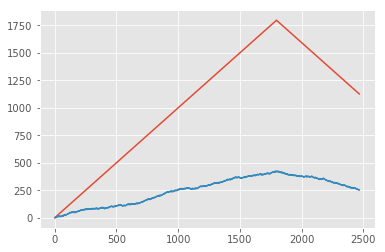

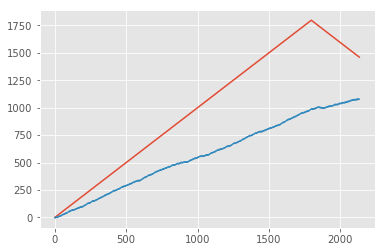

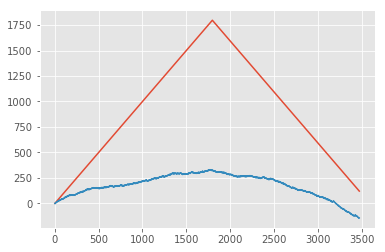

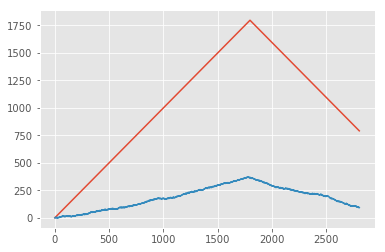

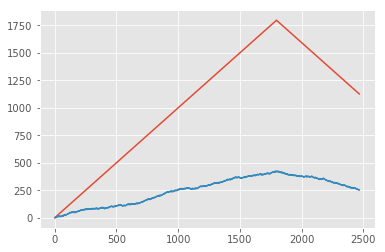

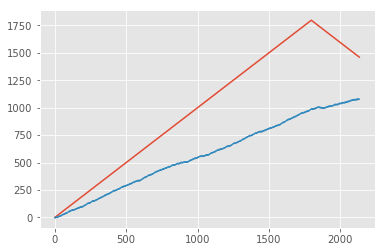

End applying the KFold evaluation
Starting final evaluation


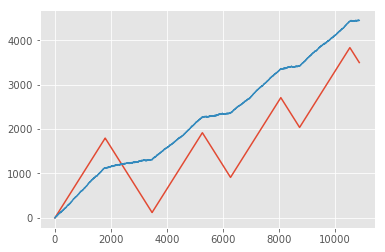

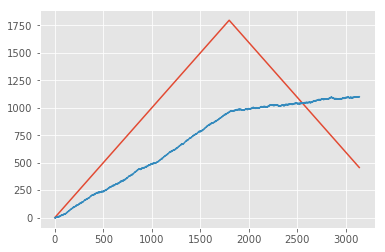

End final evaluation


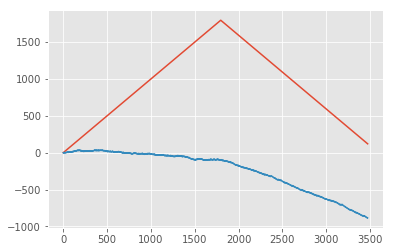

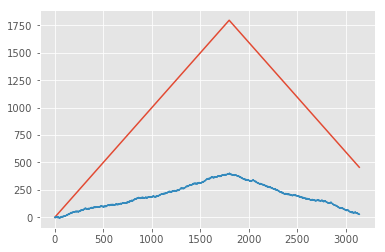

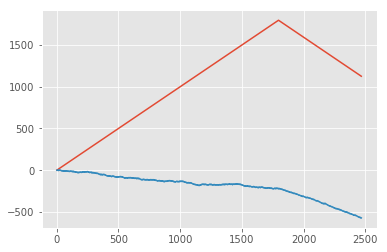

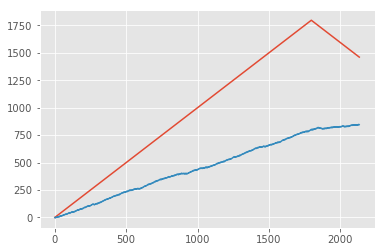

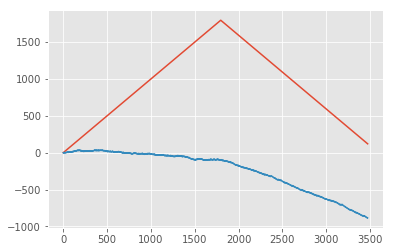

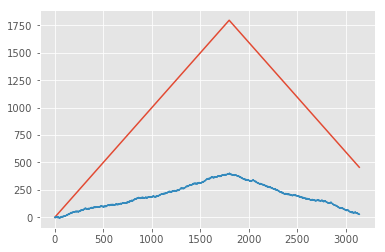

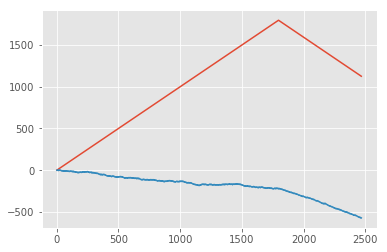

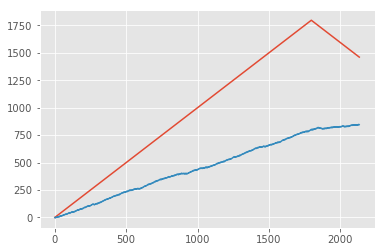

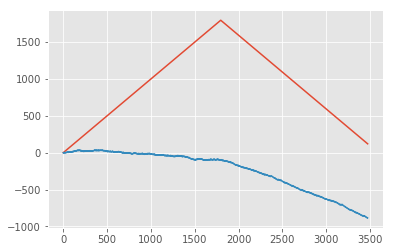

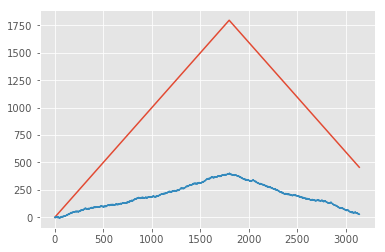

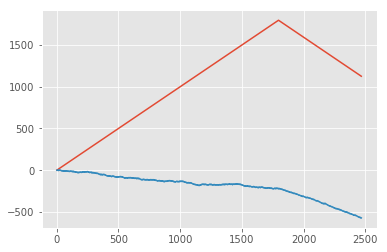

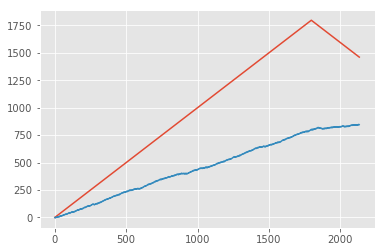

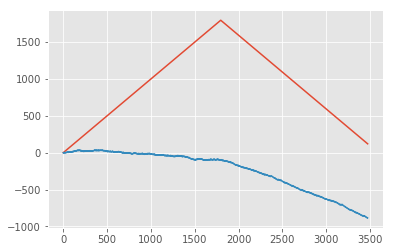

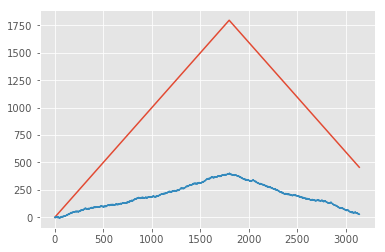

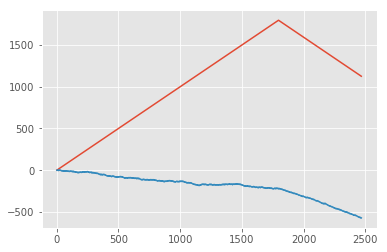

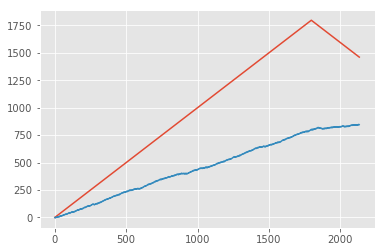

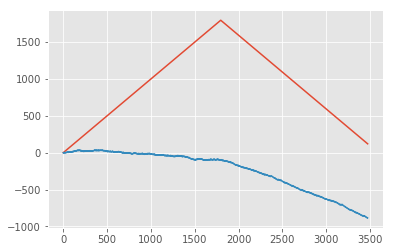

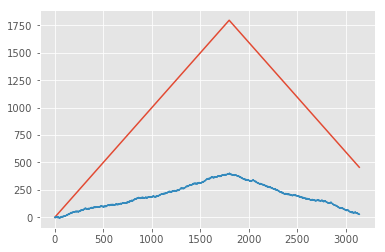

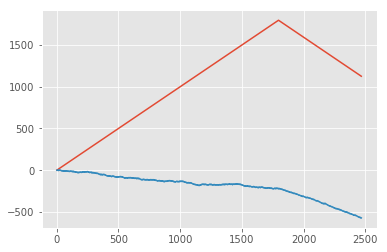

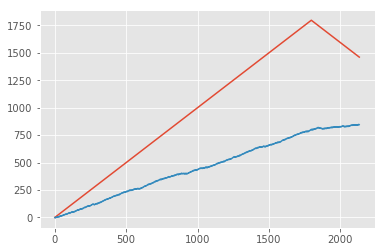

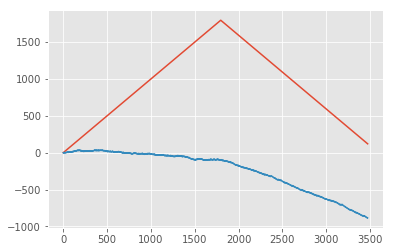

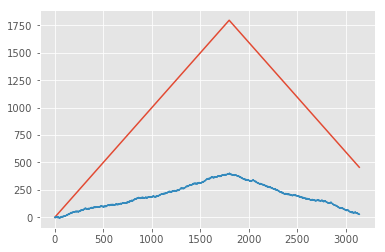

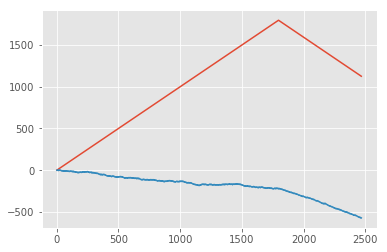

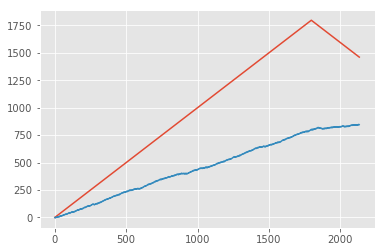

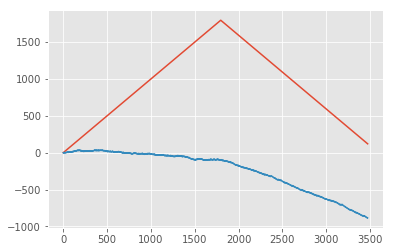

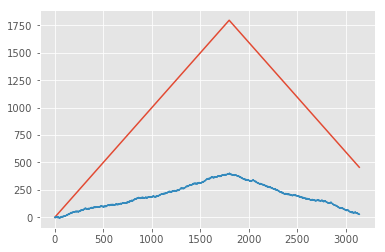

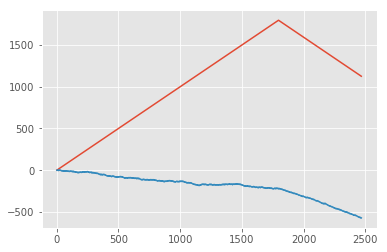

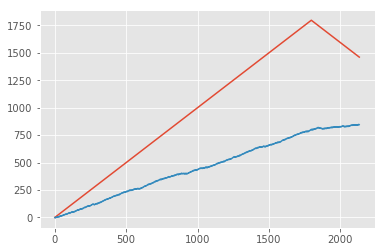

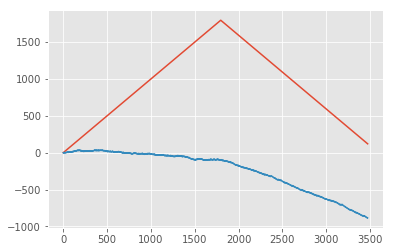

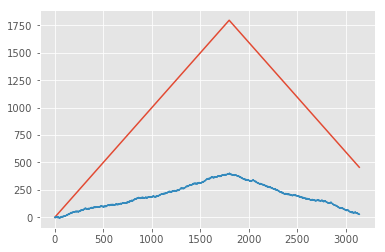

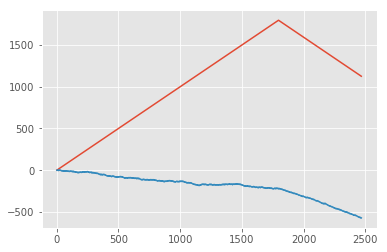

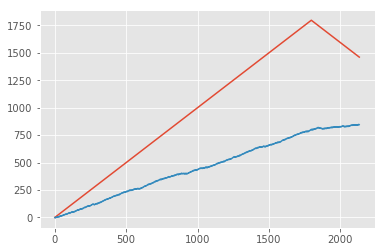

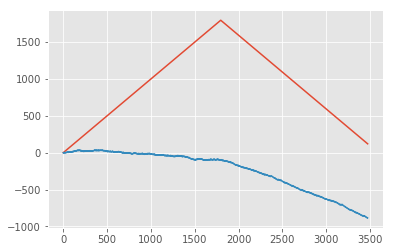

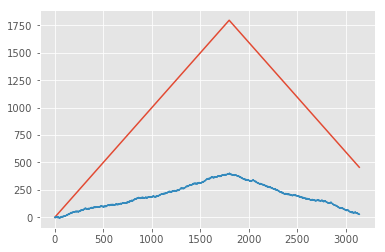

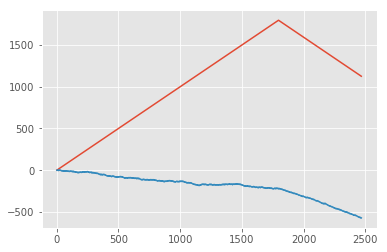

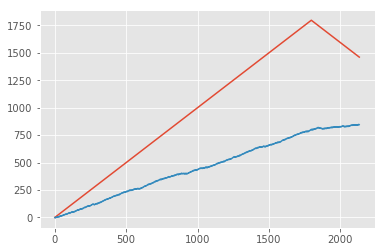

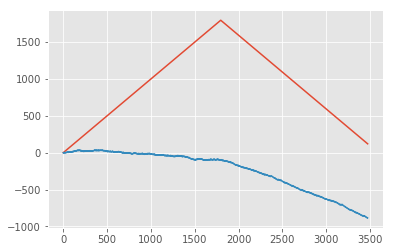

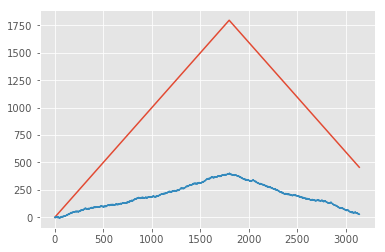

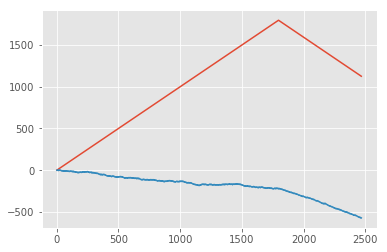

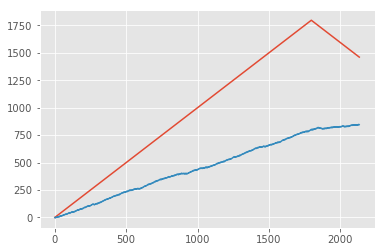

End applying the KFold evaluation
Starting final evaluation


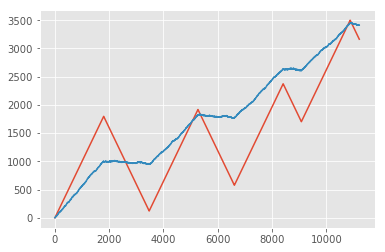

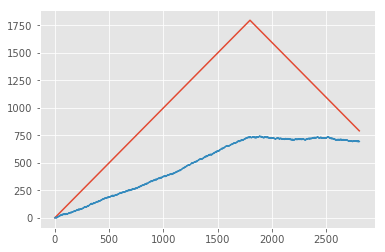

End final evaluation


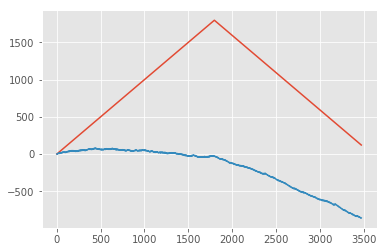

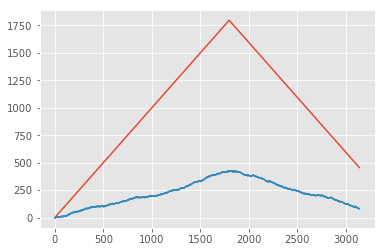

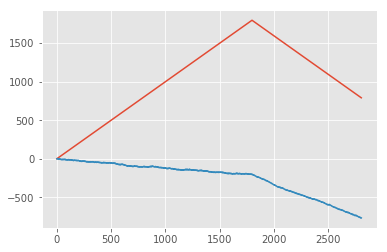

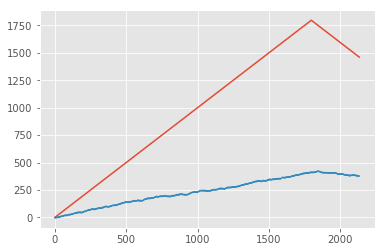

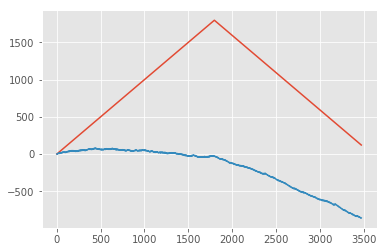

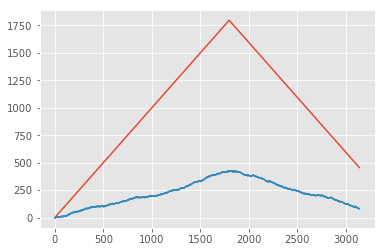

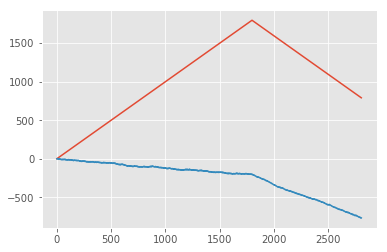

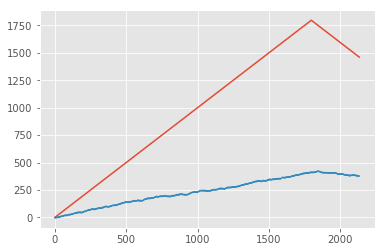

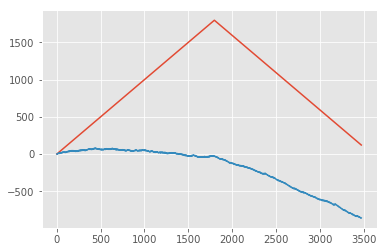

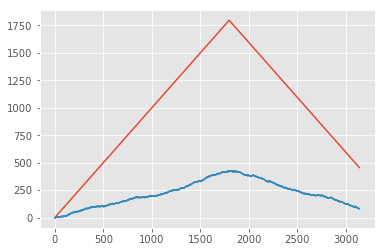

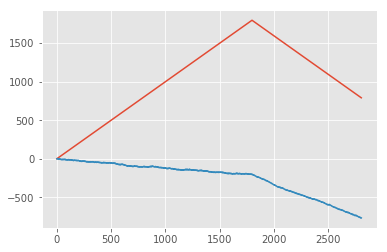

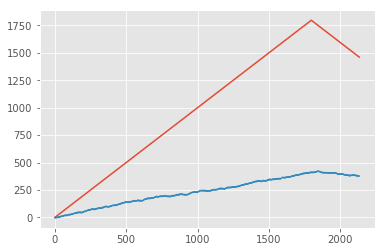

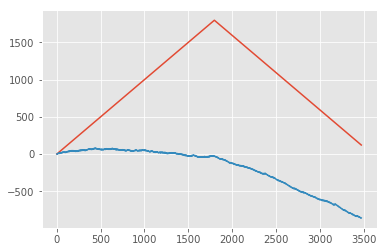

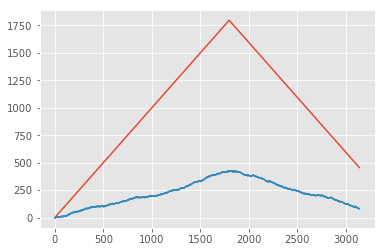

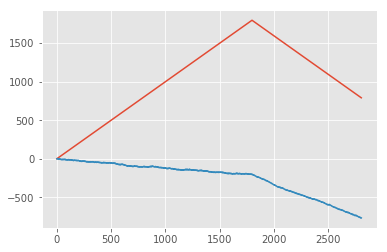

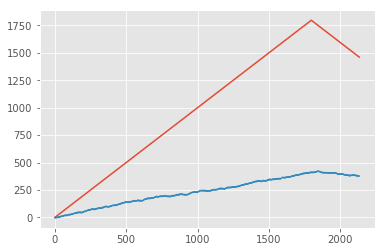

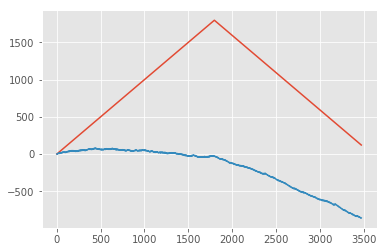

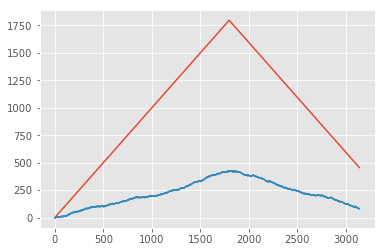

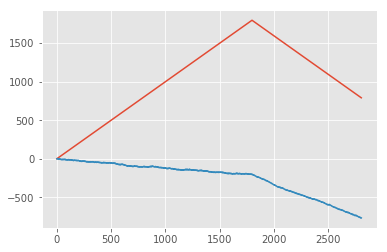

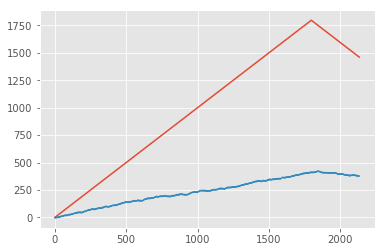

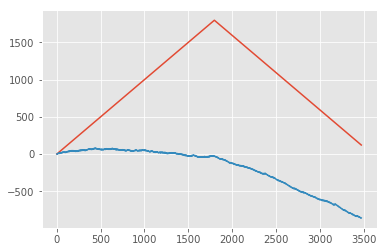

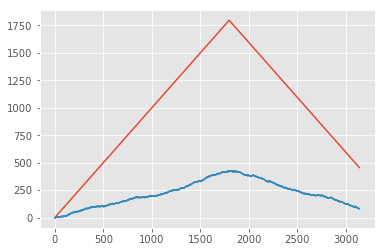

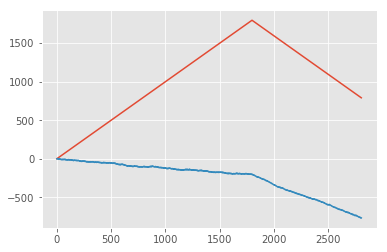

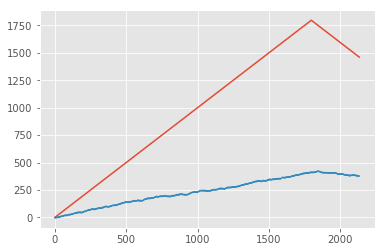

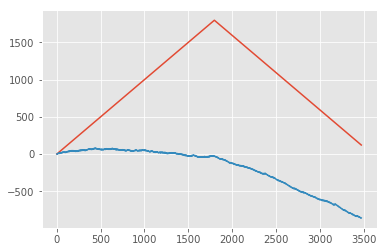

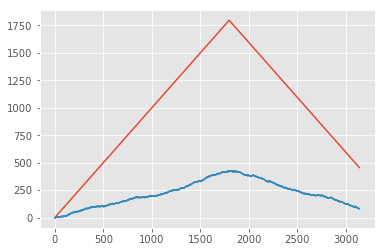

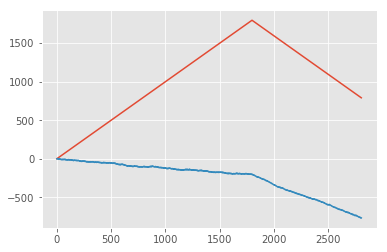

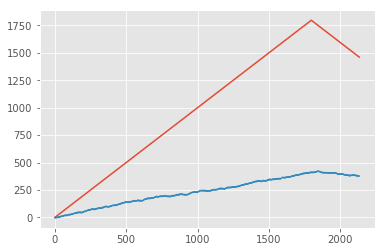

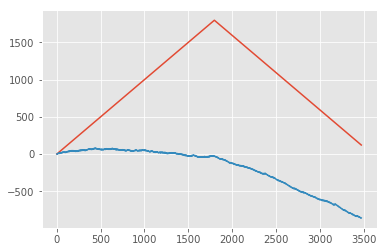

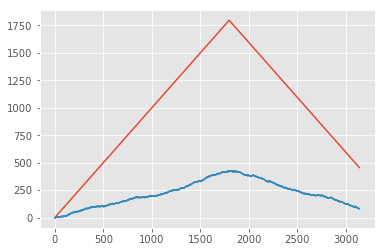

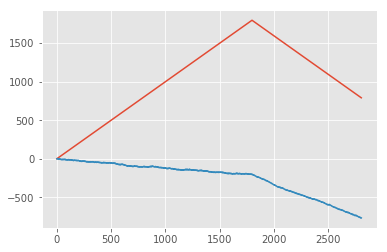

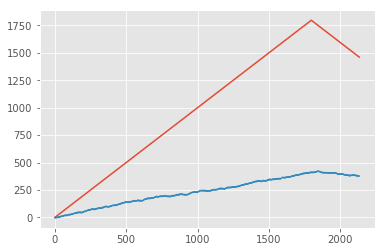

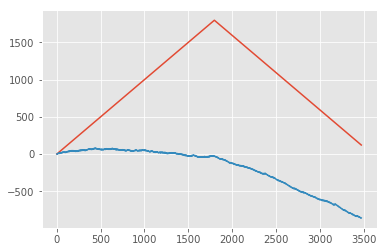

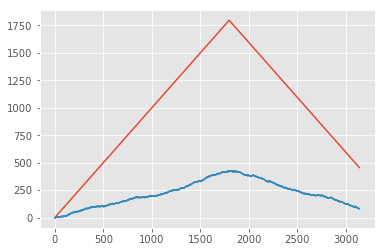

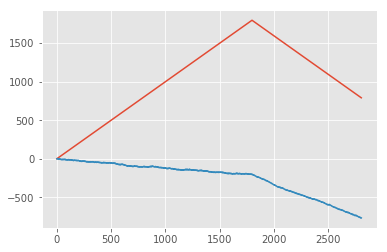

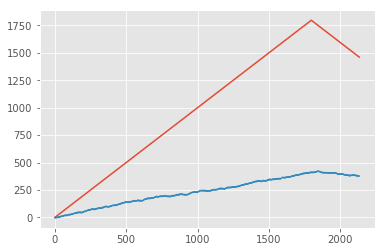

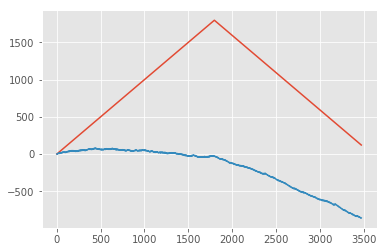

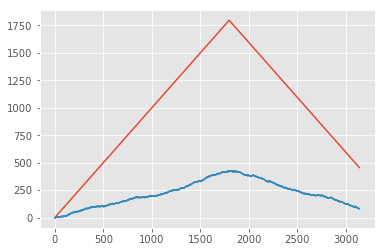

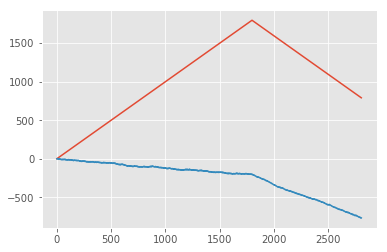

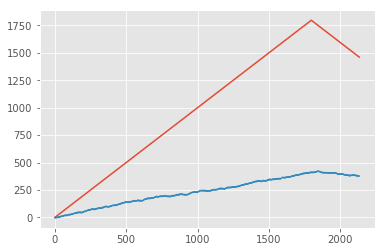

End applying the KFold evaluation
Starting final evaluation


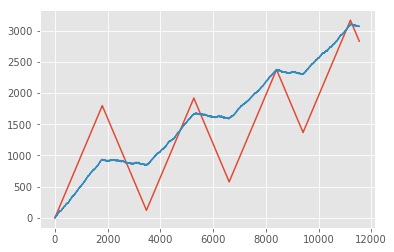

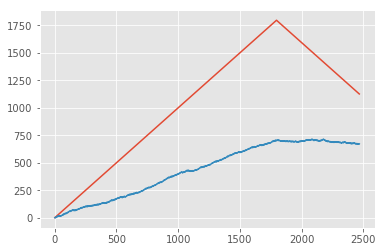

End final evaluation


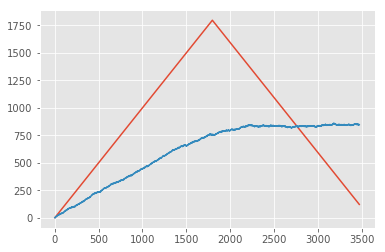

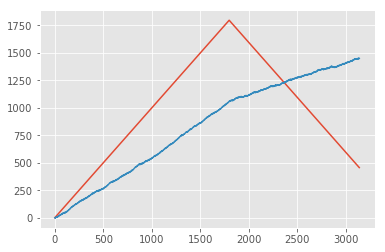

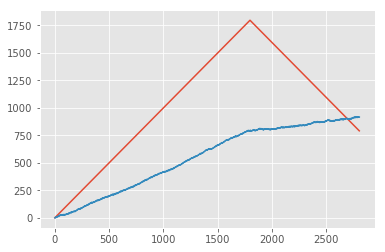

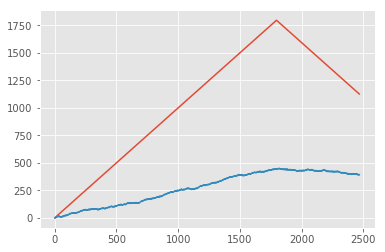

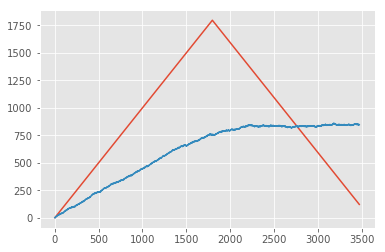

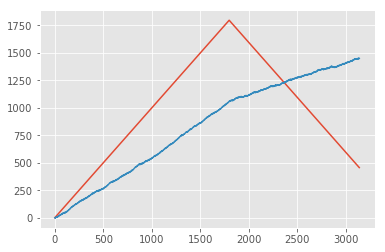

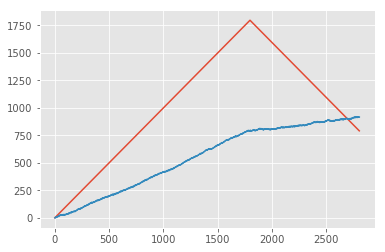

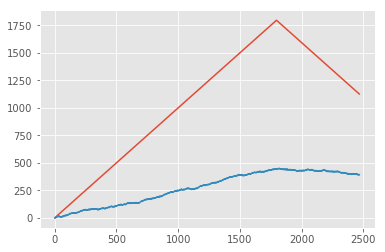

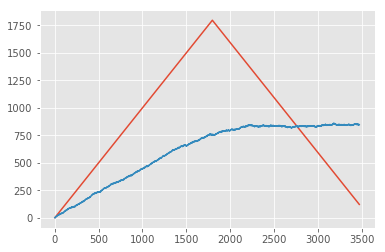

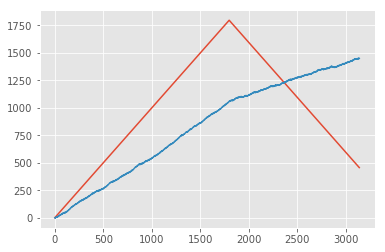

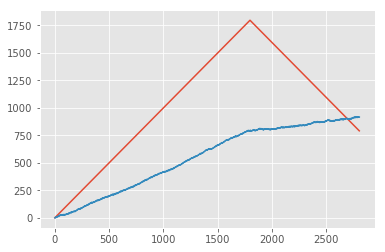

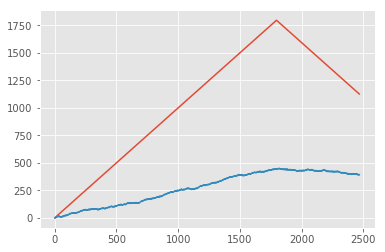

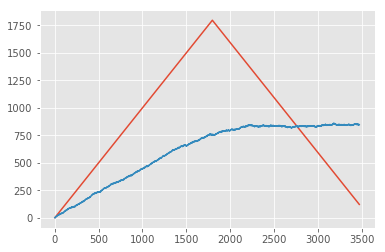

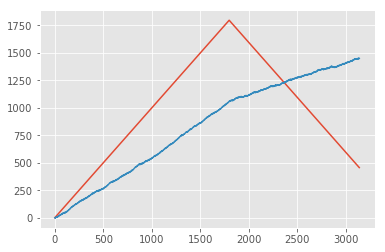

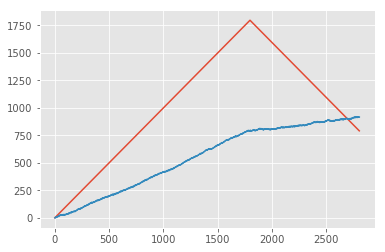

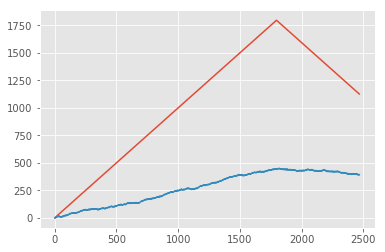

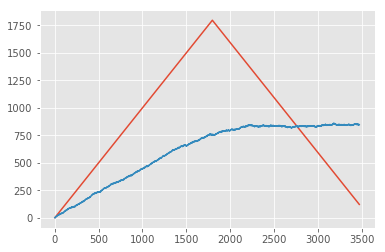

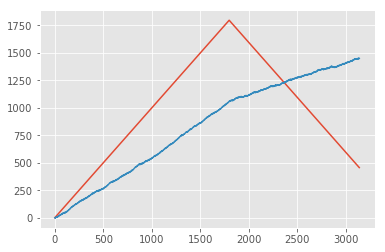

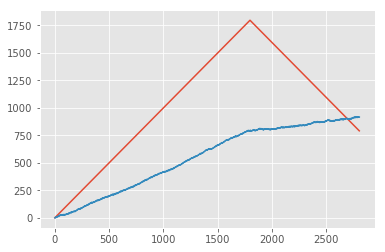

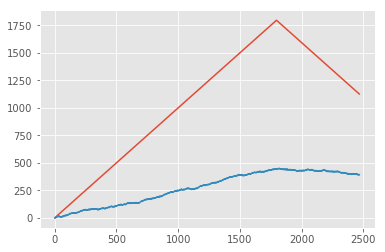

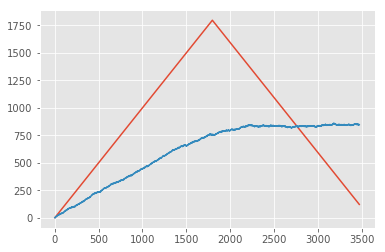

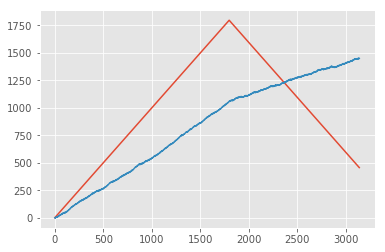

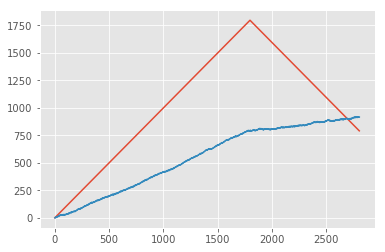

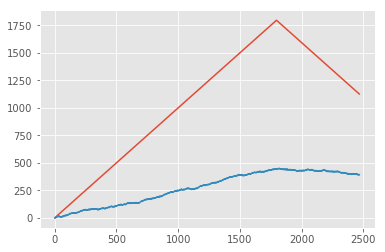

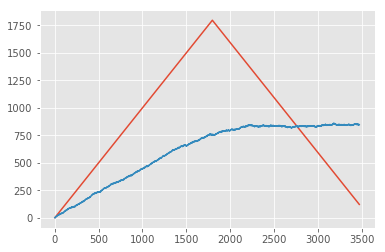

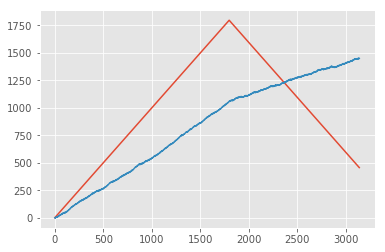

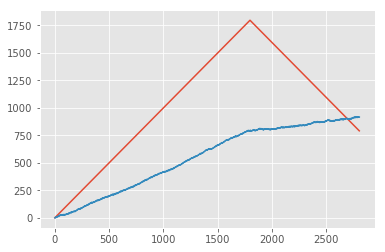

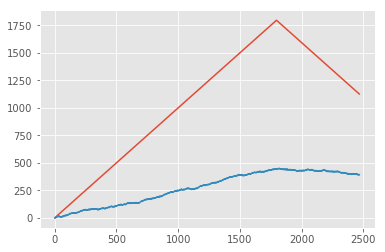

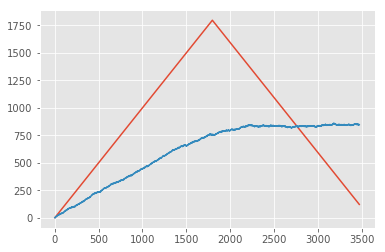

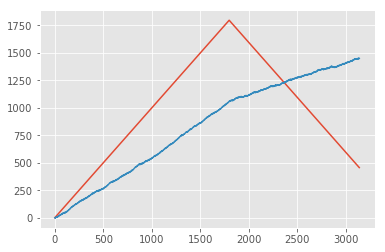

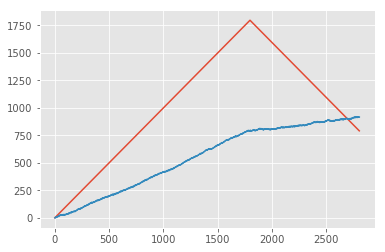

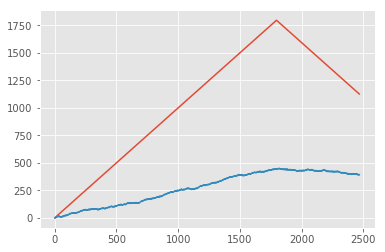

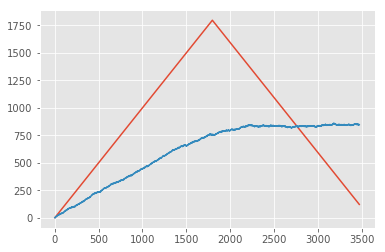

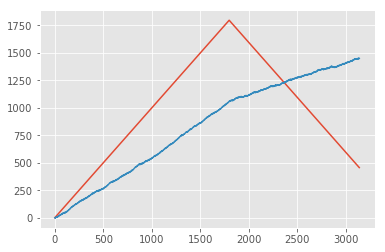

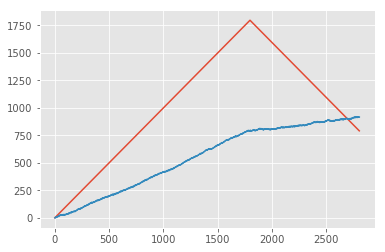

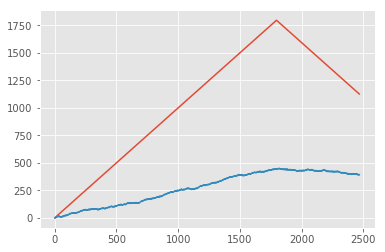

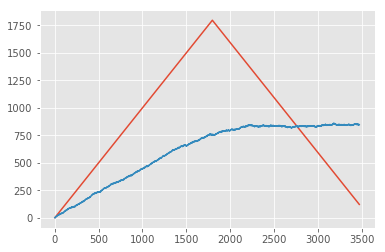

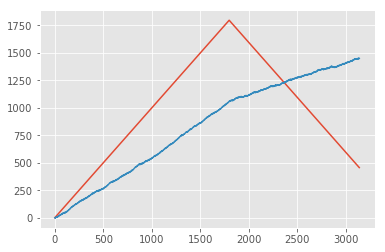

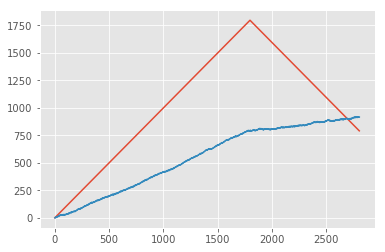

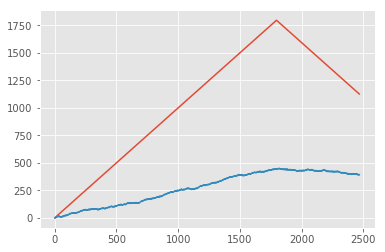

End applying the KFold evaluation
Starting final evaluation


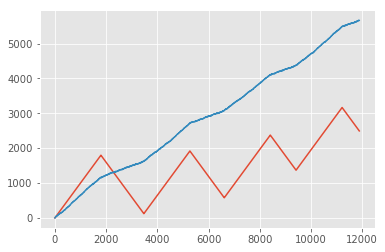

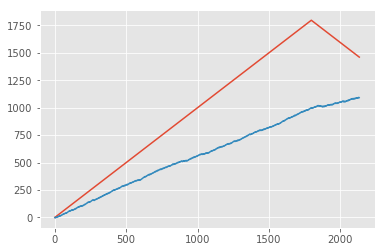

End final evaluation
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
  NB                    1    0.00   41.87    0.00
  NB                    1    0.00   30.82   63.16
  NB                    1    0.00   28.73   63.75
  NB                    1    0.00   29.67   64.87
  NB                    1    0.00   45.65    0.00


In [98]:
classifier = NBClassifier('Poistive.txt','Negative.txt')
results = classifier.trainValidateTestKFoldsClassification(range(1,100,10),5)
classifier.printResults(results)

This is the Naive Bayes classifier which is implemented with Unigrams and Bigrams generated from the review texts. This has a test Accuracy of 63.15%, which is better when compared to the Naive Bayes provided by the NLTK package. If we look at the graphs, most of the graphs indicates the positive reviews are being identified correctly, but there is deviation with respect to negative reviews. 

## Conclusion

After looking at the all the results, Support Vector Machines Classifer performed very well when compared to any other Classification algorithm, with an accuracy of ~70% in which ~95% accuracy for Positive reviews and ~45% accuracy for Negative reviews, since SVM always try to maximize the hyper plane where as each point will have maximum distance from the hyperplace.

Since most of negative reviews being classified as Positive reviews, all graphs have a straing line, rather curved line like the Actual graph. For Linear SVC we could see some slight curves due to increase in accuracy for negative sentiments.

All the results are taken on the CPU 1.4 GHz Intel Core i5, 4 GB 1600 MHz DDR3, Macintosh OSX and each of the models have taken atleast 5 minutes to train and validated the train and test data sets.  We can try to increase the dataset which could add more number of different words, for the training method, which could increase the probabilities of the feature vectors, which might increase the accuracy for Support Vector Machines even more. 

## References

 1. http://scikit-learn.org/stable/
 2. http://www.nltk.org/
 3. https://www.cs.cornell.edu/people/pabo/movie-review-data/
 4. http://www.cs.cornell.edu/home/llee/papers/sentiment.pdf
 5. http://www.nltk.org/book/ch06.html
 6. Sentiment Classification using Machine Learning Techniques by Bo Pang and Lillian Lee, Cornell University
 7. http://ataspinar.com/2015/11/16/text-classification-and-sentiment-analysis/
 8. https://pythonprogramming.net/new-data-set-training-nltk-tutorial/
 9. http://ataspinar.com/2016/05/07/regression-logistic-regression-and-maximum-entropy-part-2-code-examples/